In [0]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [188]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

## Train data

In [0]:
test=pd.read_csv("/content/drive/My Drive/walmart/test.csv")

In [257]:
test.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [0]:
train=pd.read_csv("/content/drive/My Drive/walmart/train.csv")

In [192]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [193]:
train.shape

(421570, 5)

In [0]:
#date_values=train['Date']

In [0]:
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
#train['Date'] = pd.to_datetime(train['Date'], errors='coerce')

In [0]:
#https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas

#train['day'] = train['Date'].dt.day
#train['month'] = train['Date'].dt.month
#train['year'] = train['Date'].dt.year

In [0]:
#train=train.drop(['Date'], axis=1)

In [194]:
#Find out if there are any negative values
train["Weekly_Sales"][train["Weekly_Sales"]<0].all()



True

In [0]:
#make all the negative values to zero
train["Weekly_Sales"][train["Weekly_Sales"]<0]=0

**Observations:**

*   There are negative values in Weekly_Sales 



# Stores Data

In [196]:
stores=pd.read_csv("/content/drive/My Drive/walmart/stores.csv")
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Text(0, 0.5, 'Number of Stores ')

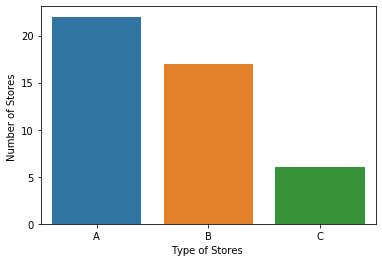

In [197]:

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
x = np.array(stores['Type'].value_counts().index)
y = np.array(stores['Type'].value_counts().values)
plt.figure()
sns.barplot(x,y)
plt.xlabel('Type of Stores ')
plt.ylabel('Number of Stores ')

**Observation :**

*   there are less number of C type stores.




# Features data

In [198]:
features=pd.read_csv("/content/drive/My Drive/walmart/features.csv")
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [199]:
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [200]:
print("")
print(features["MarkDown1"][features["MarkDown1"]<0].all())
print("______________________________________________")
print(features["MarkDown2"][features["MarkDown2"]<0].all())
print("________________________________________________")
print(features["MarkDown3"][features["MarkDown3"]<0].all())
print("_________________________________________________")
print(features["MarkDown4"][features["MarkDown4"]<0].all())
print("________________________________________________")
print(features["MarkDown5"][features["MarkDown5"]<0].all())



True
______________________________________________
True
________________________________________________
True
_________________________________________________
True
________________________________________________
True


In [0]:
features["MarkDown1"][features["MarkDown1"]<0]=0
features["MarkDown2"][features["MarkDown2"]<0]=0
features["MarkDown3"][features["MarkDown3"]<0]=0
features["MarkDown5"][features["MarkDown5"]<0]=0

In [202]:
df_full=pd.merge(train,stores,how='inner',on='Store')
df_full=pd.merge(df_full,features,how='inner',on=['Store','IsHoliday','Date'])
df_full.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,2,2010-02-05,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
2,1,3,2010-02-05,13740.12,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
3,1,4,2010-02-05,39954.04,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
4,1,5,2010-02-05,32229.38,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106


In [258]:
test_full=pd.merge(test,stores,how='inner',on='Store')
test_full=pd.merge(test_full,features,how='inner',on=['Store','IsHoliday','Date'])
test_full.head()

,Store,Dept,Date,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
1,1,2,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
2,1,3,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
3,1,4,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573
4,1,5,2012-11-02,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573


In [0]:
df=test_full
df2 = df.assign(ColumnA = df.Store.astype(str) + '_' +df.Dept.astype(str) + '_' + df.Date.astype(str))

In [0]:
df2=df2.drop(['Store','Dept','Date','IsHoliday','Type','Size','Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI','Unemployment'], axis=1)

In [204]:
df_full.describe()

,Store,Dept,Weekly_Sales,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,136727.915739,60.090059,3.361027,7246.420196,3334.992320,1439.437571,3383.168256,4628.975079,171.201947,7.960289
std,12.785297,30.492054,22711.032446,60980.583328,18.447931,0.458515,8291.221345,9475.225645,9623.075846,6292.384031,5962.887455,39.159276,1.863296
min,1.000000,1.000000,0.000000,34875.000000,-2.060000,2.472000,0.270000,0.000000,0.000000,0.220000,135.160000,126.064000,3.879000
25%,11.000000,18.000000,2079.650000,93638.000000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000
50%,22.000000,37.000000,7612.030000,140167.000000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000
75%,33.000000,74.000000,20205.852500,202505.000000,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000
max,45.000000,99.000000,693099.360000,219622.000000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000


In [205]:
test_full.describe()

,Store,Dept,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,115064.000000,115064.000000,115064.000000,115064.000000,115064.000000,114915.000000,86437.000000,105235.000000,102176.000000,115064.000000,76902.000000,76902.000000
mean,22.238207,44.339524,136497.688921,53.941804,3.581546,7691.065592,3734.098966,2403.317490,3356.219071,3922.806060,176.961347,6.868733
std,12.809930,30.656410,61106.926438,18.724153,0.239442,10697.254646,8323.473752,13767.898431,7570.501545,19445.125049,41.239967,1.583427
min,1.000000,1.000000,34875.000000,-7.290000,2.872000,0.000000,0.000000,0.000000,0.220000,0.000000,131.236226,3.684000
25%,11.000000,18.000000,93638.000000,39.820000,3.431000,1966.460000,180.350000,15.100000,155.460000,1309.300000,138.402033,5.771000
50%,22.000000,37.000000,140167.000000,54.470000,3.606000,4842.290000,742.590000,78.260000,840.940000,2390.430000,192.304445,6.806000
75%,33.000000,74.000000,202505.000000,67.350000,3.766000,9439.140000,2735.670000,272.580000,3096.920000,4227.270000,223.244532,8.036000
max,45.000000,99.000000,219622.000000,101.950000,4.125000,103184.980000,71074.170000,149483.310000,65344.640000,771448.100000,228.976456,10.199000


In [0]:
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
df_full['Date'] = pd.to_datetime(df_full['Date'], errors='coerce')

In [0]:
#https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas

df_full['day'] = df_full['Date'].dt.day
df_full['month'] = df_full['Date'].dt.month
df_full['year'] = df_full['Date'].dt.year

In [0]:
df_full=df_full.drop(['Date'], axis=1)

In [0]:
#https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/
test_full['Date'] = pd.to_datetime(test_full['Date'], errors='coerce')

In [0]:
#https://stackoverflow.com/questions/55776571/how-to-split-a-date-column-into-separate-day-month-year-column-in-pandas

test_full['day'] = test_full['Date'].dt.day
test_full['month'] = test_full['Date'].dt.month
test_full['year'] = test_full['Date'].dt.year

In [0]:
test_full=test_full.drop(['Date'], axis=1)

In [212]:
df_full.head(2)

,Store,Dept,Weekly_Sales,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day,month,year
0,1,1,24924.50,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010
1,1,2,50605.27,False,A,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010


In [213]:
test_full.head(2)

,Store,Dept,IsHoliday,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day,month,year
0,1,1,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012
1,1,2,False,A,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012


In [0]:
df_type = pd.get_dummies(df_full['Type'])

In [215]:
df_new = pd.concat([df_full, df_type], axis=1)
df_new=df_new.drop(['Type'], axis=1)

df_new.head()


,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day,month,year,A,B,C
0,1,1,24924.50,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,1,0,0
1,1,2,50605.27,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,1,0,0
2,1,3,13740.12,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,1,0,0
3,1,4,39954.04,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,1,0,0
4,1,5,32229.38,False,151315,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,2010,1,0,0


In [216]:
test_type = pd.get_dummies(test_full['Type'])

test_new = pd.concat([test_full, test_type], axis=1)
test_new=test_new.drop(['Type'], axis=1)

test_new.head()

,Store,Dept,IsHoliday,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,day,month,year,A,B,C
0,1,1,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012,1,0,0
1,1,2,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012,1,0,0
2,1,3,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012,1,0,0
3,1,4,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012,1,0,0
4,1,5,False,151315,55.32,3.386,6766.44,5147.7,50.82,3639.9,2737.42,223.462779,6.573,2,11,2012,1,0,0


In [217]:
print(test_new.shape)

(115064, 19)


In [218]:
print(df_new.shape)

(421570, 20)


In [0]:
one_in_all=df_new

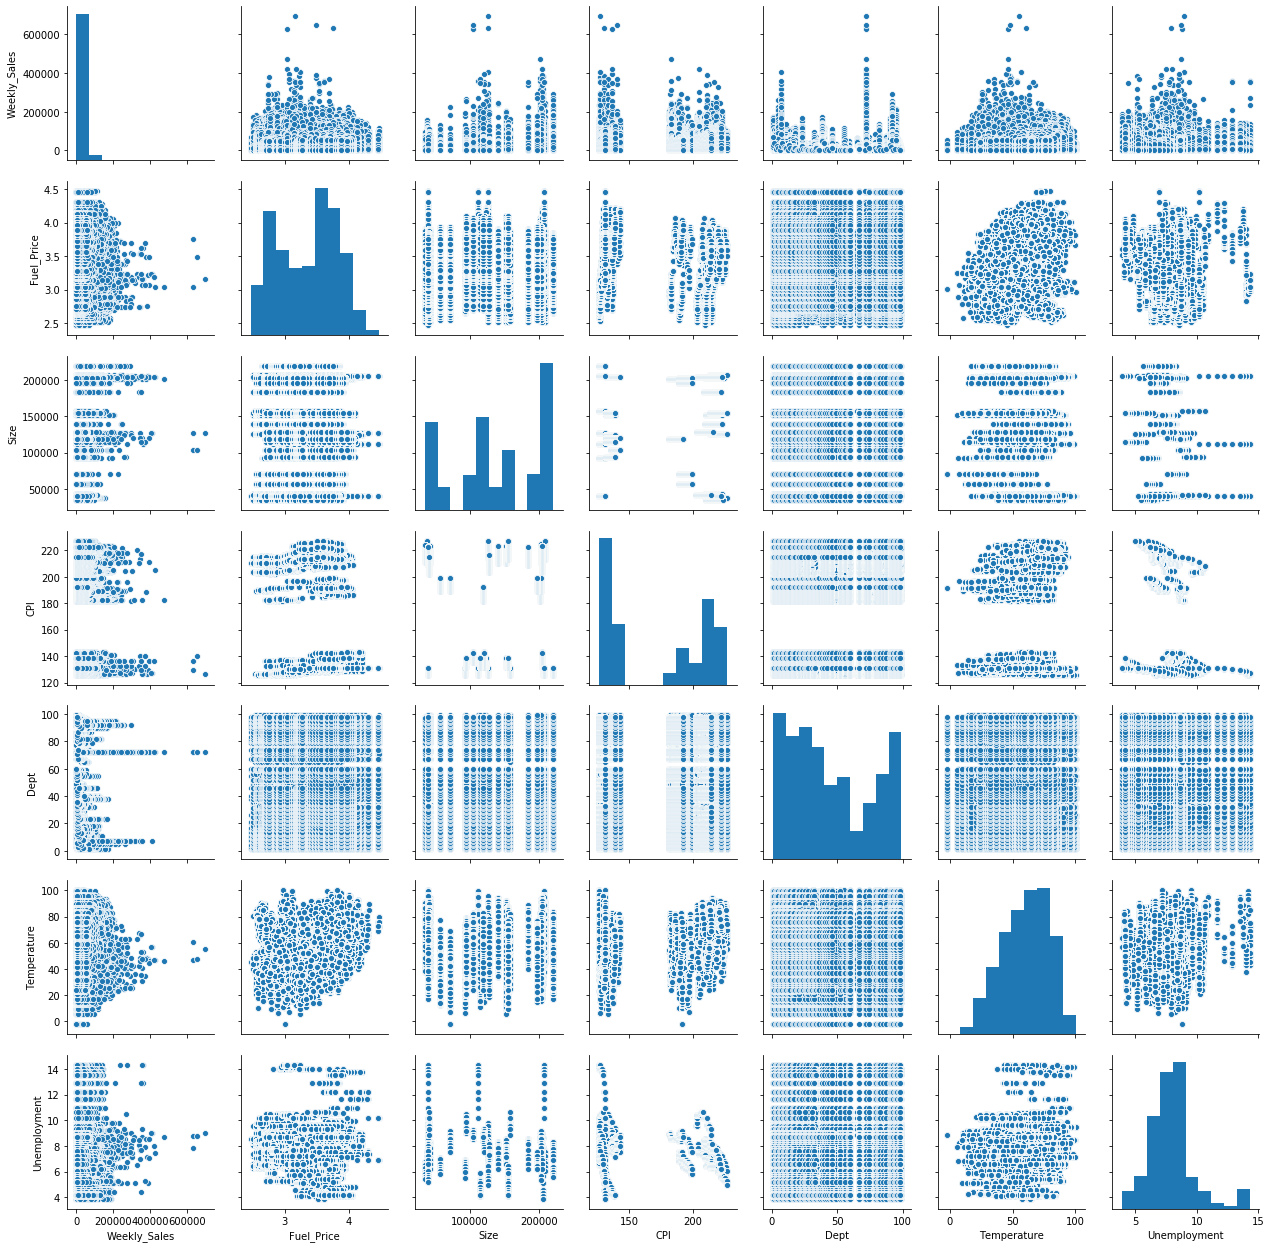

In [133]:
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
sns.pairplot(one_in_all, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment'])

In [0]:
corr = one_in_all.corr()

[]

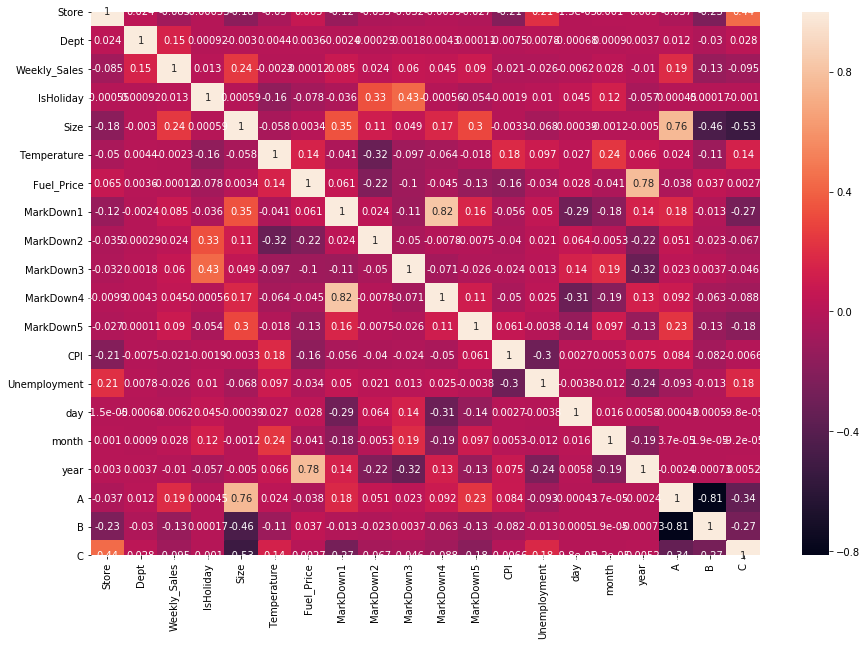

In [135]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

**Observation:**


*   There is a correlation between A and Size , Fuel_Price and year ,MarkDown1 and MarkDown4 




In [0]:
#removing one of the highly correlated features 
df_new=df_new.drop(["MarkDown4","year","Size"],axis=1)

In [0]:
#removing one of the highly correlated features 
test_new=test_new.drop(["MarkDown4","year","Size"],axis=1)

In [0]:
df_new['IsHoliday']=df_new['IsHoliday'].replace(True,5).replace(False,1)
df_new['IsHoliday'] = df_new['IsHoliday'].apply(np.int64)

In [223]:
df_new.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,day,month,A,B,C
0,1,1,24924.50,1,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,1,0,0
1,1,2,50605.27,1,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,1,0,0
2,1,3,13740.12,1,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,1,0,0
3,1,4,39954.04,1,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,1,0,0
4,1,5,32229.38,1,42.31,2.572,NaN,NaN,NaN,NaN,211.096358,8.106,5,2,1,0,0


In [0]:
df_new['MarkDown1']=df_new['MarkDown1'].fillna(df_new['MarkDown1'].mean())
df_new['MarkDown2']=df_new['MarkDown2'].fillna(df_new['MarkDown2'].mean())
df_new['MarkDown3']=df_new['MarkDown3'].fillna(df_new['MarkDown3'].mean())
df_new['MarkDown5']=df_new['MarkDown5'].fillna(df_new['MarkDown5'].mean())

In [0]:
test_new['MarkDown1']=test_new['MarkDown1'].fillna(test_new['MarkDown1'].mean())
test_new['MarkDown2']=test_new['MarkDown2'].fillna(test_new['MarkDown2'].mean())
test_new['MarkDown3']=test_new['MarkDown3'].fillna(test_new['MarkDown3'].mean())
test_new['MarkDown5']=test_new['MarkDown5'].fillna(test_new['MarkDown5'].mean())

In [226]:
df_new.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,day,month,A,B,C
0,1,1,24924.50,1,42.31,2.572,7246.420196,3334.99232,1439.437571,4628.975079,211.096358,8.106,5,2,1,0,0
1,1,2,50605.27,1,42.31,2.572,7246.420196,3334.99232,1439.437571,4628.975079,211.096358,8.106,5,2,1,0,0
2,1,3,13740.12,1,42.31,2.572,7246.420196,3334.99232,1439.437571,4628.975079,211.096358,8.106,5,2,1,0,0
3,1,4,39954.04,1,42.31,2.572,7246.420196,3334.99232,1439.437571,4628.975079,211.096358,8.106,5,2,1,0,0
4,1,5,32229.38,1,42.31,2.572,7246.420196,3334.99232,1439.437571,4628.975079,211.096358,8.106,5,2,1,0,0


In [227]:
test_new.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,day,month,A,B,C
0,1,1,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
1,1,2,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
2,1,3,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
3,1,4,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
4,1,5,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0


In [0]:
y=np.array(df_new['Weekly_Sales'])

x=np.array(df_new.drop(['Weekly_Sales'],axis=1))

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# SGD Regressor

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [0]:
from sklearn.linear_model import SGDRegressor
svm_model=SGDRegressor()

In [148]:
alphas =[10**-4, 10**-2, 10**0, 10**2, 10**4]

param_grid = {'alpha':alphas,'loss':['squared_loss','huber','epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['l1','l2','elasticnet'],
'learning_rate':['constant','optimal','invscaling','adaptive'] }
grid = GridSearchCV(estimator = svm_model,param_grid=param_grid ,scoring = 'r2')
grid.fit(X_train, y_train)


print(grid.best_estimator_)
print(grid.score(X_test, y_test))

SGDRegressor(alpha=0.01, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l2', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)
0.06955048302689926


In [149]:
svm_model=SGDRegressor(alpha=1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l1', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)
svm_model.fit(X_train,y_train)

SGDRegressor(alpha=1, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='adaptive', loss='squared_epsilon_insensitive',
             max_iter=1000, n_iter_no_change=5, penalty='l1', power_t=0.25,
             random_state=None, shuffle=True, tol=0.001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [150]:
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
from sklearn.metrics import mean_squared_error, r2_score
preds = svm_model.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

R2 score : 0.07
Mean squared error: 489149515.61


# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(n_jobs=-1)

In [152]:
param_grid = {'fit_intercept':[True,False],'normalize':[True,False]}
grid = GridSearchCV(estimator = lr,param_grid=param_grid ,scoring = 'r2')
grid.fit(X_train, y_train)


print(grid.best_estimator_)
print(grid.score(X_test, y_test))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)
0.06954857792890268


In [153]:
lr=LinearRegression(copy_X=True, fit_intercept=True, normalize=False,n_jobs=-1)
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [154]:
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
from sklearn.metrics import mean_squared_error, r2_score
preds = lr.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

R2 score : 0.07
Mean squared error: 489155846.58


# Decision Tree Regressor

In [0]:
from sklearn.tree import DecisionTreeRegressor 
dt=DecisionTreeRegressor()

In [156]:
param_grid = {'max_depth':[1,5,10,15,20,25,30],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
grid = GridSearchCV(estimator = dt,param_grid=param_grid ,scoring = 'r2')
grid.fit(X_train, y_train)


print(grid.best_estimator_)
print(grid.score(X_test, y_test))

DecisionTreeRegressor(criterion='mse', max_depth=25, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
0.9547790697393355


In [157]:
dt=DecisionTreeRegressor(criterion='mse', max_depth=30, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
dt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=30, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=4,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [158]:
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
preds = dt.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

R2 score : 0.95
Mean squared error: 23950304.81


# Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [160]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':[1,5,10,15,20,25,30],'n_estimators':[20,50,100],
  'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}
grid = RandomizedSearchCV(rf,param_grid ,scoring = 'r2')
grid.fit(X_train, y_train)


print(grid.best_estimator_)
print(grid.score(X_test, y_test))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=2, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
0.9681272566875261


In [161]:
rf=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=25,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [162]:
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
preds = rf.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

R2 score : 0.97
Mean squared error: 16912007.90


# Gradient Boosted Regressor

In [0]:
from xgboost import XGBRegressor
xgb=XGBRegressor(n_jobs=-1)

In [269]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {'max_depth':[10,15,20,25,30],
              'n_estimators':[20,50,100],
              'learning_rate':[0.001,0.01,0.1,1]}
grid = RandomizedSearchCV(xgb,param_grid ,scoring = 'r2')
grid.fit(X_train, y_train)


print(grid.best_estimator_)
print(grid.score(X_test, y_test))

[18:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:51:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:52:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:53:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:54:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:55:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:57:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:00:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [270]:
xgb=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=25, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)
xgb.fit(X_train,y_train)

[19:25:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=25, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [271]:
#https://www.bmc.com/blogs/mean-squared-error-r2-and-variance-in-regression-analysis/
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import median_absolute_error
preds = xgb.predict(X_test)
print("R2 score : %.2f" % r2_score(y_test,preds))
print("Mean squared error: %.2f" % mean_squared_error(y_test,preds))

R2 score : 0.97
Mean squared error: 13630313.14


# Deep learning model

In [167]:
#https://machinelearningmastery.com/regression-tutorial-keras-deep-learning-library-python/
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(512, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Using TensorFlow backend.






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               2176      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               66048     
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 331,393
Trainable params: 331,393
Non-trainable params: 0
____________________________________________

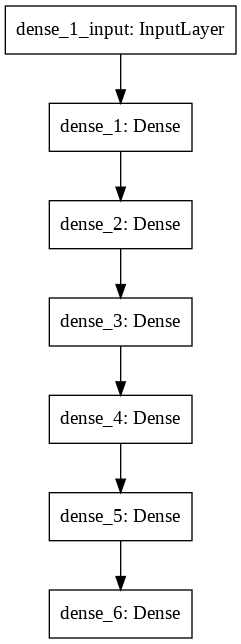

In [168]:
# https://github.com/mmortazavi/EntityEmbedding-Working_Example/blob/master/EntityEmbedding.ipynb
#https://stackoverflow.com/questions/36886711/keras-runtimeerror-failed-to-import-pydot-after-installing-graphviz-and-pyd
from keras.utils import plot_model
import keras
import pydotplus
from keras.utils.vis_utils import model_to_dot
#keras.utils.vis_utils.pydot = pydot
#import pydot_ng as pydot
plot_model(NN_model, to_file='model_2.png')
from IPython.display import Image
Image(retina=True, filename='model_2.png')

In [0]:
checkpoint_name = 'Weights.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_mean_squared_error', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [170]:
NN_model.fit(X_train,y_train, epochs=500, batch_size=500, validation_split = 0.2, callbacks=callbacks_list)





Train on 269804 samples, validate on 67452 samples
Epoch 1/500





269804/269804 [==============================] - 9s 33us/step - loss: 445837209.5726 - mean_squared_error: 445837209.5726 - val_loss: 391077112.1105 - val_mean_squared_error: 391077112.1105

Epoch 00001: val_mean_squared_error improved from inf to 391077112.11054, saving model to Weights.hdf5
Epoch 2/500
269804/269804 [==============================] - 4s 16us/step - loss: 383305425.1872 - mean_squared_error: 383305425.1872 - val_loss: 374144541.3727 - val_mean_squared_error: 374144541.3727

Epoch 00002: val_mean_squared_error improved from 391077112.11054 to 374144541.37271, saving model to Weights.hdf5
Epoch 3/500
269804/269804 [==============================] - 4s 16us/step - loss: 366726922.0978 - mean_squared_error: 366726922.0978 - val_loss: 352950033.5485 - val_mean_squared_error: 352950033.5485

Epoch 00003: val_mean_squared_error improved from 374144541.37271 to 352950033.54848, saving model to Weights.hdf5

In [174]:
from prettytable import PrettyTable
a = PrettyTable()
print("Linear SVM")
a.field_names = ["Vectorizer", "R2 score", "Mean squared error"]
a.add_row(["SGD Regressor",0.07,489147229.03])
a.add_row(["Linear Regression", 0.07,489155769.05])
a.add_row(["Decision Tree Regressor", 0.95,23946726.690])
a.add_row(["Random Forest Regressor", 0.97, 16745697.24])
a.add_row(["Gradient Boosted Regressor", 0.97,13627727.66])
a.add_row(["Deep learning model",'.',23021606.53])
print(a)

Linear SVM
+----------------------------+----------+--------------------+
|         Vectorizer         | R2 score | Mean squared error |
+----------------------------+----------+--------------------+
|       SGD Regressor        |   0.07   |    489147229.03    |
|     Linear Regression      |   0.07   |    489155769.05    |
|  Decision Tree Regressor   |   0.95   |    23946726.69     |
|  Random Forest Regressor   |   0.97   |    16745697.24     |
| Gradient Boosted Regressor |   0.97   |    13627727.66     |
|    Deep learning model     |    .     |    23021606.53     |
+----------------------------+----------+--------------------+


**Observation:**

*    Gradient Boosted Regressor is the best compaired to others  



# Submission

In [0]:
nans = lambda df: df[df.isnull().any(axis=1)]

In [250]:
nans(test_new)

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,day,month,A,B,C


In [0]:
test_new['CPI']=test_new['CPI'].fillna(test_new['CPI'].mean())
test_new['Unemployment']=test_new['Unemployment'].fillna(test_new['Unemployment'].mean())

In [0]:
xgb.fit(X_train,y_train)

In [253]:
test_new.head()

,Store,Dept,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown5,CPI,Unemployment,day,month,A,B,C
0,1,1,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
1,1,2,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
2,1,3,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
3,1,4,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0
4,1,5,False,55.32,3.386,6766.44,5147.7,50.82,2737.42,223.462779,6.573,2,11,1,0,0


In [0]:
test_a=np.array(test_new)

In [0]:
sc_X = StandardScaler()
test_a = sc_X.fit_transform(test_a)

In [0]:
pred =xgb.predict(test_a)

In [267]:
pred.shape

(115064,)

In [265]:
df2.shape

(115064, 1)

In [0]:
submission = pd.DataFrame({
        "Id": df2["ColumnA"],
        "Weekly_Sales": pred
    })
submission.to_csv('submission.csv', index=False)

In [0]:
pred2 =rf.predict(test_a)

In [0]:
submission2 = pd.DataFrame({
        "Id": df2["ColumnA"],
        "Weekly_Sales": pred2
    })
submission2.to_csv('submission2.csv', index=False)